In [72]:
import numpy as np
import pandas as pd
import matplotlib as plt
from constants import TRAINING_SET, VALIDATION_SET

pd.set_option("display.precision", 2)
%config InlineBackend.figure_format = 'retina'

In [73]:
df_e = pd.read_csv(TRAINING_SET)
df_e.head()

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
0,1,00:00:00:6a:17:ce,1,11,2,Wednesday,0,True,2676
1,2,00:00:00:6a:17:ce,1,11,2,Wednesday,1,True,2676
2,3,00:00:00:6a:78:ae,1,10,30,Sunday,20,False,0
3,4,00:00:02:fa:9c:12,1,11,13,Sunday,12,True,2272
4,5,00:00:08:7d:e2:58,3,11,4,Friday,19,False,0


In [74]:
print(df_e.shape)

(249556, 9)


In [75]:
print(df_e.columns)

Index(['Unnamed: 0', 'device_mac', 'branch_office', 'month_tz', 'day_tz',
       'day_of_week_tz', 'hour_tz', 'visitor', 'tiempodeses'],
      dtype='object')


Let's explore more general information using `info`

In [76]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      249556 non-null  int64 
 1   device_mac      249556 non-null  object
 2   branch_office   249556 non-null  int64 
 3   month_tz        249556 non-null  int64 
 4   day_tz          249556 non-null  int64 
 5   day_of_week_tz  249556 non-null  object
 6   hour_tz         249556 non-null  int64 
 7   visitor         249556 non-null  bool  
 8   tiempodeses     249556 non-null  int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 15.5+ MB


Like we said, 9 columns numbered from 0 to 8, the first column is unnamed, potentially could be the index of our table records. `int64`, `object` and `bool` are the data types of our features. Only one feature is `bool`, being more precise and two are of type `object`, the rest are `int64`. Not entirely sure if **`day_of_week_tz`** should be an `object` type as it holds week day names, maybe a `category` data type is better suited. According to the initial documentation the `bool` variable **`visitor`** is actually the classification or target value.

We can also see that there are no missing values. Each column contains the same number of non-null values equal to the total size of rows that we saw with `shape`.

We can **change the column type** with the `astype` method. Let's apply this method to the **`visitor`** feature to convert it into `int64`. We will not be modifying the same column but rather we will create a new column with the changed data type.

In [77]:
df_e['visitor_int64']=df_e['visitor'].astype("int64")

In [78]:
df_e.describe()

,Unnamed: 0,branch_office,month_tz,day_tz,hour_tz,tiempodeses,visitor_int64
count,249556.00,249556.00,249556.00,249556.00,249556.00,249556.00,249556.00
mean,124778.50,1.88,10.88,14.80,13.64,2374.75,0.34
std,72040.76,0.94,0.33,9.47,5.27,8058.89,0.47
min,1.00,1.00,10.00,1.00,0.00,0.00,0.00
25%,62389.75,1.00,11.00,7.00,10.00,0.00,0.00
50%,124778.50,1.00,11.00,13.00,14.00,0.00,0.00
75%,187167.25,3.00,11.00,24.00,18.00,421.00,1.00
max,249556.00,3.00,11.00,31.00,23.00,68062.00,1.00


The samples were taken in the months of October (`10`) and November (`11`).

We see that there could be three banch offices given the range of values given by the `min` and `max` values, we would have to confirm this. The same logic applies for the `hour_tz` feature, meaning that we could have samples from all hours in a day.

In [79]:
print(pd.unique(df_e['branch_office']))
print(len(pd.unique(df_e['hour_tz'])))

[1 3 2]
24


We were correct, three unique branches and 24 unique hours. Let's dive a little deeper around the time dimensionalities of the dataframe and visualize their actual distribution, could be an interesting exploration.

Text(0.5, 1.0, 'hour_tz')

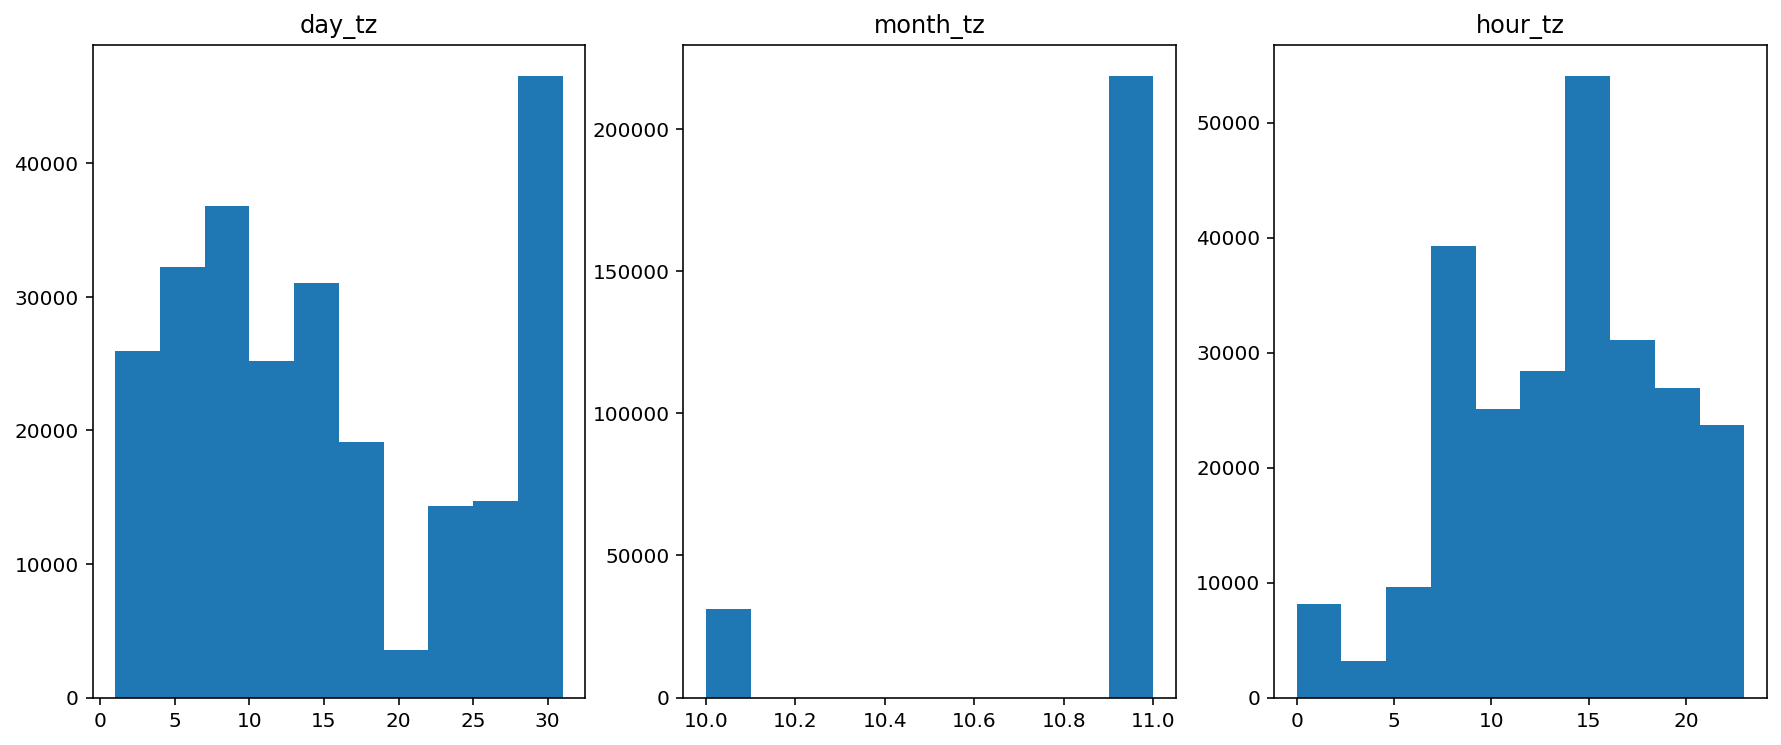

In [80]:
# for all users
fig, axs = plt.pyplot.subplots(1, 3, figsize=(15, 6), sharey=False)

axs[0].hist(df_e['day_tz'])
axs[0].set_title("day_tz")

axs[1].hist(df_e['month_tz'])
axs[1].set_title("month_tz")

axs[2].hist(df_e['hour_tz'])
axs[2].set_title("hour_tz")

In [81]:
# let's dig deeper around the non-visitor class and their relation with the time session
print("Mean of tiempodeses for non-visitors: ", df_e[df_e["visitor"] == 0]["tiempodeses"].mean())

print("Minimum value of tiempodeses for non-visitors: ", df_e[df_e["visitor"] == 0]["tiempodeses"].min())
print("Maximum value of tiempodeses for non-visitors: ", df_e[df_e["visitor"] == 0]["tiempodeses"].max())

df_e[df_e["visitor"] == 0]["tiempodeses"].describe()

Mean of tiempodeses for non-visitors:  4.385169677199475
Minimum value of tiempodeses for non-visitors:  0
Maximum value of tiempodeses for non-visitors:  1715


count    164312.00
mean          4.39
std          18.12
min           0.00
25%           0.00
50%           0.00
75%           0.00
max        1715.00
Name: tiempodeses, dtype: float64

Not quite "all zero-value" records, however, we can clearly see a high relationship between non-visitors and low values in `tiempodeses`, we could consider outliers the ones with high values.

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [82]:
df_e.describe(include=['bool','object'])

,device_mac,day_of_week_tz,visitor
count,249556,249556,249556
unique,125252,7,2
top,00:20:00:94:8e:d3,Wednesday,False
freq,489,48812,164312


Let's visualize the distribution of some of the non-numerical features. For plotting the distribution of categorical features we need to do a little bit of extra work and actually compute the frequency of the unique values, we can use the `value_counts` method to do so.

<AxesSubplot:>

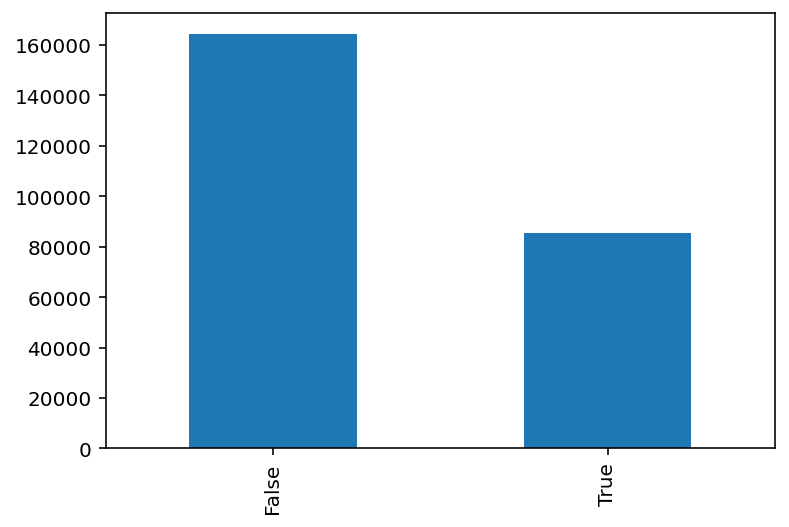

In [83]:
df_e['visitor'].value_counts().plot(kind='bar')

Here is in numerical form

In [84]:
df_e['visitor'].value_counts()

False    164312
True      85244
Name: visitor, dtype: int64

In [85]:
df_e['visitor_int64'].value_counts()

0    164312
1     85244
Name: visitor_int64, dtype: int64

85244 users out of 249556 are actual visitors; their `visitor_int64` value is `1`. To calculate fractions, pass `normalize=True` to the `value_counts` function

In [86]:
df_e['visitor_int64'].value_counts(normalize=True)

0    0.66
1    0.34
Name: visitor_int64, dtype: float64

Could there be a relationship between visitors/non-visitors and the time dimensionalities? We will use the `unstack` method to pivot the grouped dataset and convertit back into a proper form.

<AxesSubplot:xlabel='hour_tz'>

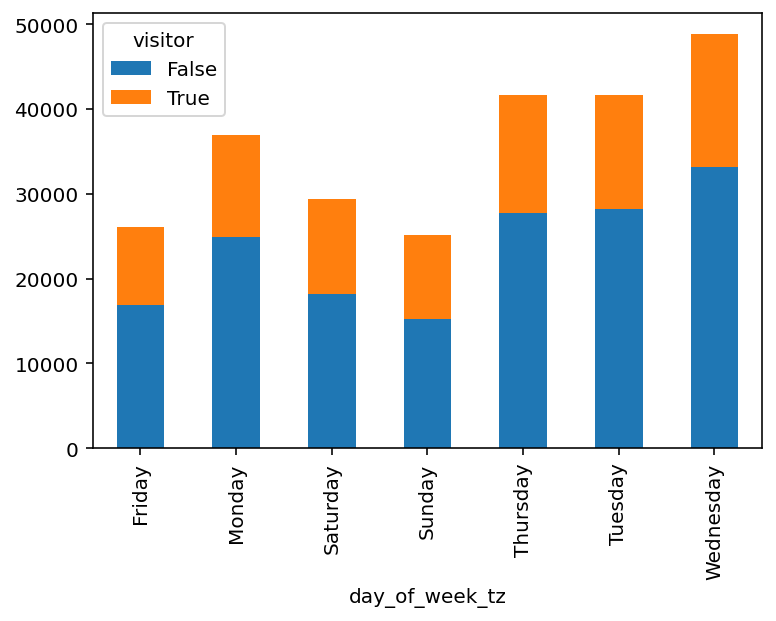

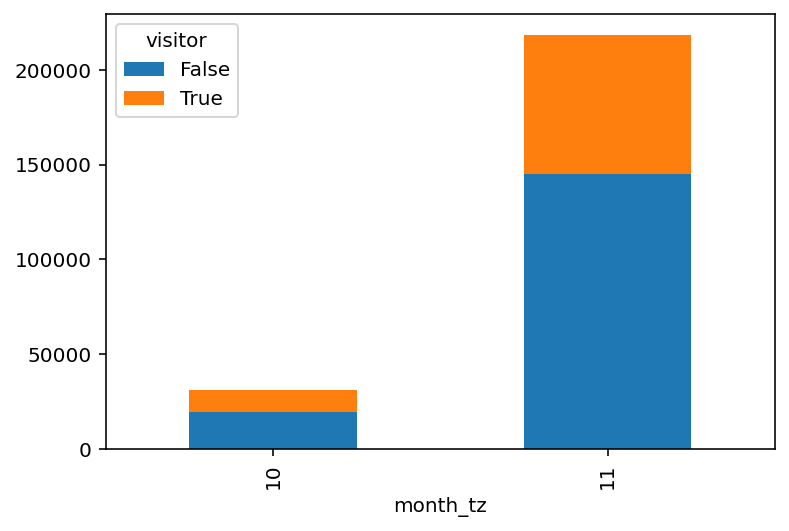

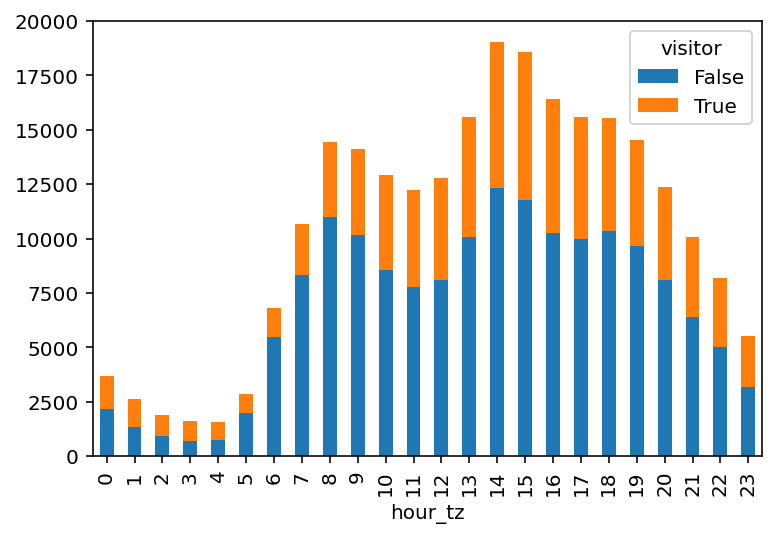

In [87]:
df_e.groupby(['day_of_week_tz', 'visitor'])['visitor'].size().unstack('visitor').plot.bar(stacked=True, legend=True)
df_e.groupby(['month_tz', 'visitor'])['visitor'].size().unstack('visitor').plot.bar(stacked=True, legend=True)
df_e.groupby(['hour_tz', 'visitor'])['visitor'].size().unstack('visitor').plot.bar(stacked=True, legend=True)

Not much variability for the `day_tz` and `month_tz` features. We can see a little bit of variability for the `hour_tz` feature, however, this could very well be noise.

Let us go back to our original hypothesis, we have a potential descriptor for the user type: `tiempodeses`.


In [88]:
df_e.groupby(["visitor"])["tiempodeses"].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
visitor,,,,
False,4.39,18.12,0,1715
True,6943.75,12586.74,0,68062


What about the session time by branch?

In [89]:
df_e.groupby(["visitor", "branch_office"])["tiempodeses"].agg([np.mean, np.std, np.min, np.max])

mean       std  amin   amax
visitor branch_office                                
False   1                 5.26     18.44     0    315
        2                 6.25     19.94     0    214
        3                 3.09     17.35     0   1715
True    1              7164.52  14177.94     0  68062
        2              8979.42  12031.18     0  64424
        3              5538.57   9454.80     0  64443

Summarizing everything we've found so far:

1. In general, there are ~2 times more non-visitors than visitors.
2. At the branch level, ratios between visitors and non-visitors varies and can reach even greater values.
3. There seems to be a high correlation between session times and user types.
4. There does not seem to be a high description between the time dimensionalities and the user types.
5. Session times do not seem to be highly affected by the difference in branches.

Based on this findings, let us try and our first attempt at predicting the User type class.

We will use the 75% quartile of session time from non-visitors as a cutting point.

In [90]:
threshold = 0 # 75% quantile
df_e['predicted_class']=df_e['tiempodeses']>threshold

Let's compare the actual class versus the predicted class through a correlation analysis.

In [91]:
df_e['predicted_class'].corr(df_e['visitor'])

0.8653523919391636

This is actually pretty good, a single threshold allow us to predict the correct class 8.5 out of 10 times. What if we play a little bit more with the threshold?

In [92]:
threshold = 1715 # max tiempodeses for non-visitors
df_e['predicted_class']=df_e['tiempodeses']>threshold
df_e['predicted_class'].corr(df_e['visitor'])

0.6181007403319427

Not great, another clue pointing towards defining the value as an outlier

In [93]:
threshold = 4.39 # mean tiempodeses for non-visitors
df_e['predicted_class']=df_e['tiempodeses']>threshold
df_e['predicted_class'].corr(df_e['visitor'])

0.8698539310165189

A little bit of improvement, what if we consider the std as well?


In [94]:
threshold = 4.39 + 18.12 # mean + std tiempodeses for non-visitors
df_e['predicted_class'] = df_e['tiempodeses'] > threshold
df_e['predicted_class'].corr(df_e['visitor'])

0.8901997505726059

Much better, almost 9 out of 10 times we are predicting the right class. Could it be that splitting the analysis by branch office we get better results?

In [95]:
df_e.groupby(["visitor", "branch_office"])["tiempodeses"].agg([np.mean, np.std, np.min, np.max])

mean       std  amin   amax
visitor branch_office                                
False   1                 5.26     18.44     0    315
        2                 6.25     19.94     0    214
        3                 3.09     17.35     0   1715
True    1              7164.52  14177.94     0  68062
        2              8979.42  12031.18     0  64424
        3              5538.57   9454.80     0  64443

In [96]:
def classification(branch: pd.Series, session_time: pd.Series) -> bool:
    """Classify users into visitor and non-visitor

    Args:
        branch (int): Branch identifier
        session_time (int): Session length in seconds

    Returns:
        bool: True for visitor, False otherwise
    """
    if branch == 1:
        if session_time > (5.26 + 18.44):
            return True
    elif branch == 2:
        if session_time > (6.25 + 19.94):
            return True
    elif branch == 3:
        if session_time > (3.09 + 17.35):
            return True
    return False

df_e['predicted_class'] = df_e[['branch_office', 'tiempodeses']].apply(lambda x: classification(x[0], x[1]), axis=1)

In [97]:
df_e['predicted_class'].corr(df_e['visitor'])

0.8901649771982967

Looks like there is no improvement, we could go further down the rabbit hole of manual manipulation of rules or we could always use an automated way of finding the rules.

In [98]:
def load_dataset(dataset: pd.DataFrame, feature_names: list, target_name: str = None) -> tuple:
    """Splits a dataframe into features
    and target values

    Args:
        dataset (pd.Dataframe): Dataset with features and target values

    Returns:
        tuple: Feature and target variables in a two-element tuple
    """
    # print(feature_names, target_name)
    X = dataset.loc[:, feature_names]
    # initialize an empty dataframe
    y = pd.DataFrame()
    if target_name:
        y = dataset.loc[:, target_name]
    return (X, y)

We need to adjust our dataset to the methods expectations, all object features have to converted to a numerical form, for example.

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# pre-process the data to find the best features

# fix device_mac, turn string values to numeric ones
codes, uniques = pd.factorize(df_e["device_mac"], sort=True)
df_e['device_mac']=codes

# fix day_of_week_tz, turn string values to numeric ones
codes, uniques = pd.factorize(df_e["day_of_week_tz"], sort=True)
df_e['day_of_week_tz']=codes

# get rid of target value and its derived features. 
X_columns = df_e.loc[:, ~df_e.columns.isin(['visitor', 'visitor_int64','predicted_class', 'Unnamed: 0'])].columns.values
y_column = 'visitor_int64'

X, y = load_dataset(df_e, X_columns, y_column)

Now that we are ready, we can pass the data to the classifier and let it compute the feature importance

In [100]:
# randomly selecting an ensambler, leaving all parameters to default values and allowing it to create 50 estimators
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)     

Let's now print the feature importance, the greater the value the better as a predictor for the target value

In [101]:
for name, importance in (zip(clf.feature_names_in_, clf.feature_importances_)):
    print(name,": ", importance)

device_mac :  0.06918437720897148
branch_office :  0.019751607971297398
month_tz :  0.000511848065117431
day_tz :  0.007625160444791184
day_of_week_tz :  0.004577683555688773
hour_tz :  0.029144529139712317
tiempodeses :  0.8692047936144215


We can see now, according to our ensemble, that the top three features are `tiempodeses`, `hour_tz` and surprisingly `device_mac`. We would have to be careful with this last feature as it could very much bias our results in future samples.

In [102]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

C:\Users\ruben\OneDrive\Documents\DevF\environment\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(249556, 1)

According to the SelectFromModel transfomer, with default configurations, there's a single descriptor worth using, in this case `tiempodeses`. Of course, if we wanted to we could change the selection threshold and/or rules.

Let's try and train a model using 70% of the data as training data and the rest for testing purposes.

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=0)

# train a new classifier with the training data
clf_new = ExtraTreesClassifier(n_estimators=50)
clf_new = clf_new.fit(X_train, y_train)

Let's see how it performs vs the test set

In [104]:
clf_new.score(X_test, y_test)

0.9619725646813683

This is a great improvement, 96% using a single descriptor is great as it makes the model lighter and easier to maintain. It is also worth nothing that there is not a single tweak in our model parameters, all are default values.

Let use evaluate the model in our validation set

In [105]:
# load validation set
df_v = pd.read_csv(VALIDATION_SET)

# we don't need to run the same pre-processing steps as we will
# go ahead and select feature that is ready.

# get descriptive variable tiempodeses
X_columns = df_v.loc[:, df_v.columns.isin(['tiempodeses'])].columns.values
y_column = None

X_val, y_val = load_dataset(df_v, X_columns, y_column)

prediction = clf_new.predict(X_val)

C:\Users\ruben\OneDrive\Documents\DevF\environment\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


We could now save the results back into the validation set

In [106]:
df_v['predicted_visitor'] = prediction

In [107]:
df_v

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,predicted_visitor
0,1,a8:81:95:56:31:3c,1,11,17,Thursday,4,0,0
1,2,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,1
2,3,0c:b3:19:10:78:17,3,11,12,Saturday,10,0,0
3,4,44:74:6c:0a:20:23,3,11,27,Sunday,21,0,0
4,5,ac:5f:3e:c8:dc:35,1,11,27,Sunday,16,0,0
...,...,...,...,...,...,...,...,...,...
89995,89996,44:74:6c:cc:85:28,1,11,29,Tuesday,18,530,1
89996,89997,a0:91:69:e3:58:ba,3,11,28,Monday,7,0,0
89997,89998,64:51:06:9c:7b:57,3,11,5,Saturday,9,0,0
89998,89999,f8:cf:c5:d9:10:79,3,11,4,Friday,9,0,0


We can also save the produced model, this way we can share it with other developers or use it for our own interest without the need of retraining everytime.

In [108]:
from joblib import dump, load
import os

# save it if it doesn-t exist already
if not os.path.exists('./model/devf_clf.joblib'):
    dump(clf, './model/devf_clf.joblib')

To load our model we can always say
```
clf = load('path\to\model.joblib')
```